# Introduction to neural network classification with TensorFlow

In this notebook, we're going to learn how to write neural networks for classification problems.
A classification problem is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is little hard to visualize... Let's visualize it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],
                        "X1":X[:,1],
                        "labels":y})

In [ ]:
circles

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


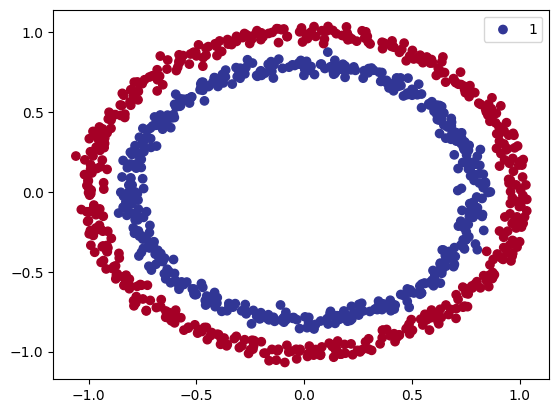

In [ ]:
# Visualize with a ploit
import matplotlib.pyplot as plt
plt.scatter(X[:,0],
            X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);
plt.legend(y)

## Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first examples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling in TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate
...

In [ ]:
import tensorflow as tf

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X,
            y,
            epochs=5
)

Epoch 1/5
32/32 [==============================] - 2s 7ms/step - loss: 7.2926 - accuracy: 0.5010
Epoch 2/5
32/32 [==============================] - 0s 10ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000


In [ ]:
# Let's try and improve our model by training for longer...
model_1.fit(X,
            y,
            epochs=200,
            verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Since we are working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing
So let's step things up a notch and add an extra layer.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API, this time with two layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X,
            y,
            epochs=100,
            verbose=0
)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932236552238464, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API, this time with two layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model (this time 3 layers)
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X,
            y,
            epochs=100,
            verbose=0
)

In [ ]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6971 - accuracy: 0.5060


[0.697086751461029, 0.5059999823570251]

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_preds = model_2.predict(X)

32/32 [==============================] - 0s 2ms/step


In [ ]:
y_preds[0]

array([0.49302846], dtype=float32)

To visualize our model's predictions, let's create a function `plot_decision_boundary()` this function will:

* Take in a trained model, features(X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls).

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plot decision boundary created by a model predicting on X.
  This function was inspired by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  2. https://github.com/GokuMohandas/Made-With-ML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),  # Mesh grid va créer deux matrices l'une avec les x horizontalement, l'autre avec les y verticalement
                       np.linspace(y_min, y_max, 100))  # e.g x = [1,2] => [1,2], [1,2] et y = [5,6] => [5,5], [6,6]

  # Create X_values (we're going to make predictions on this)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together, ravel() puts matrix components in one. e.g [1, 2], [1,2] => [1,2,1,2] et [5,5], [6,6] => [5,5,6,6]
                                       # c_[] donne la transposé des ligne ci-dessus [1, 5],[2,5],[1,6],[2,6]
  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape) # Le resultat est remis en matrice de la forme

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7) # alpha is the brightness, plot the background
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max()) # lim of x
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


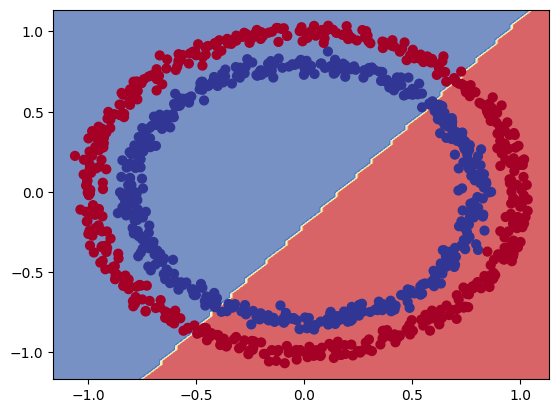

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

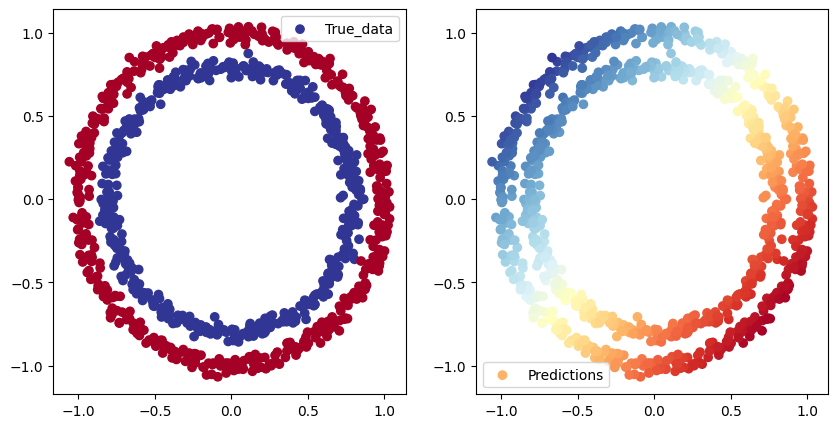

In [ ]:
# plot the data predictions
fig , (ax0, ax1) = plt.subplots(nrows=1,
                              ncols=2,
                             figsize=(10,5))
# Plot the data in green
ax0.scatter(X[:,0],
            X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu,
            label="True_data")
ax0.legend();
# Plot the predictions in red
ax1.scatter(X[:,0],
            X[:,1],
            c=y_preds,
            cmap=plt.cm.RdYlBu,
            label="Predictions")
ax1.legend();

In [ ]:
# Let's see if our model can be used for a regression model...
tf.random.set_seed(42)

# Create some regresion data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Let's split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

Oh wait... we compiled our model for a binary classification problem.
But... we're now working on a regression problem, let's change the model to suit our data.


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API, this time with two layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1,)), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model (this time 3 layers)
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_reg_train,
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 535.1584 - mae: 535.1584
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 382.8634 - mae: 382.8634
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 237.4096 - mae: 237.4096
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 87.9451 - mae: 87.9451
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 80.3974 - mae: 80.3974
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 109.9023 - mae: 109.9023
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 73.8229 - mae: 73.8229
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 47.2542 - mae: 47.2542
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 51.0360 - mae: 51.0360
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 43.3754 - mae: 43.3754
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 4ms/step


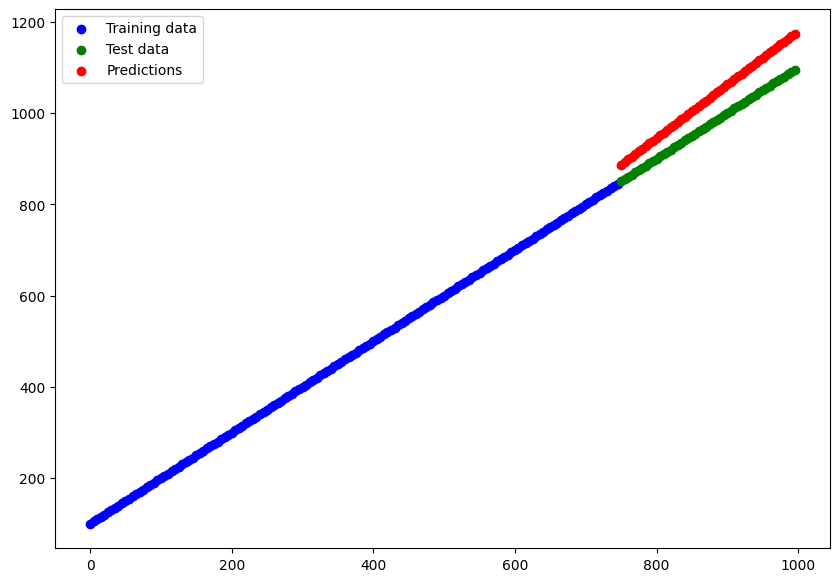

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

## The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API, this time with two layers
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X,
            y,
            epochs=100

)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.4796 - accuracy: 0.4910
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4775 - accuracy: 0.4910
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4591 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4540 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 6.4465 - accuracy: 0.4900
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4418 - accuracy: 0.4890
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4415 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4413 - accuracy: 0.4890
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4412 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4410 - accuracy: 0.4880
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


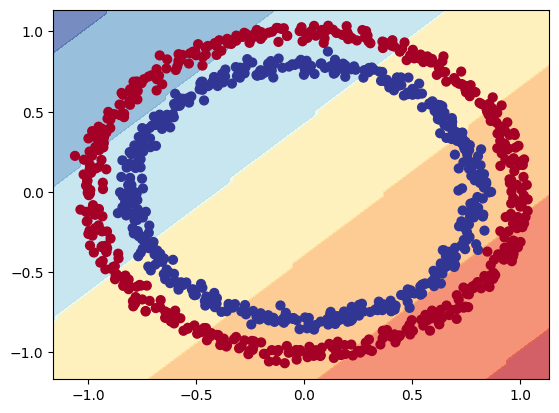

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_4,
                       X,
                       y)

Let's try build our first neural network with a non-linear activation function.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API, this time with two layers
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X,
            y,
            epochs=100
)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.8361 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8174 - accuracy: 0.4780
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7975 - accuracy: 0.4780
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7925 - accuracy: 0.4780
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7873 - accuracy: 0.4780
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7838 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7541 - accuracy: 0.4770
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7463 - accuracy: 0.4770
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7329 - accuracy: 0.4770
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7299 - accuracy: 0.4770
Epoch 11/

In [ ]:
# Create early stopping callback
def create_early_stopping(monitor_, patience_):
  early_stopping_ = tf.keras.callbacks.EarlyStopping(monitor=monitor_,
                                                    patience=patience_)
  return early_stopping_

In [ ]:
# Time to replicate the multi-layer neural network from TensorFlow playground

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API, this time with two layers
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X,
            y,
            epochs=100,
)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 2.9642 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2983 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1516 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0752 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0109 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9533 - accuracy: 0.4590
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8923 - accuracy: 0.4590
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8396 - accuracy: 0.4660
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8084 - accuracy: 0.4770
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7870 - accuracy: 0.4820
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


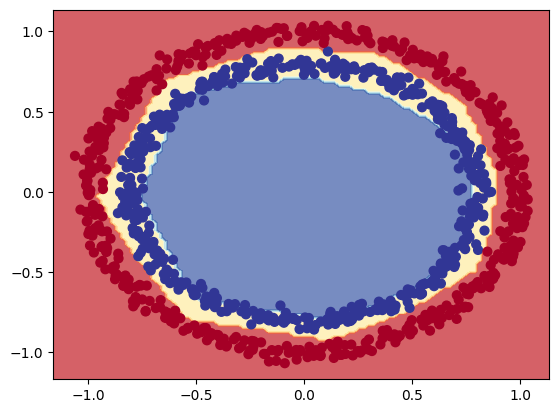

In [ ]:
plot_decision_boundary(model_6, X, y)

In [ ]:
# Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9980


[0.016802113503217697, 0.9980000257492065]

In [ ]:
# Retry with activation of output layer as simgmoïd
# Set the random seed
tf.random.set_seed(42)
early_stopping = create_early_stopping("accuracy", 3)
# 1. Create the model using the sequential API, this time with two layers
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X,
            y,
            epochs=100,
            callbacks=[early_stopping]
)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7085 - accuracy: 0.5060
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.4680
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4800


313/313 [==============================] - 0s 1ms/step
doing binary classification


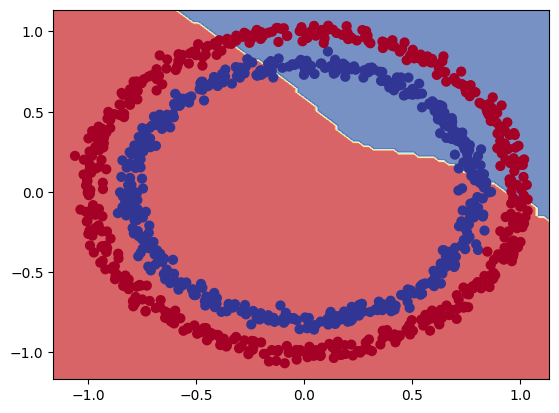

In [ ]:
# plot the results
plot_decision_boundary(model_7, X, y)

In [ ]:
# Evaluate the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.4740


[0.6967142224311829, 0.4740000069141388]

🤔 **Question:** What's wrong with the predictions we've made ? Are we really evaluating our model correctly ? Hint: what data did the model learn on and what data did we predict on ?

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non straight lines) functions** is one of the key fundamentals of neural networks.

Now we'have discussed the concept of linear or non-linear functions (or lines), let's see them in action.

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

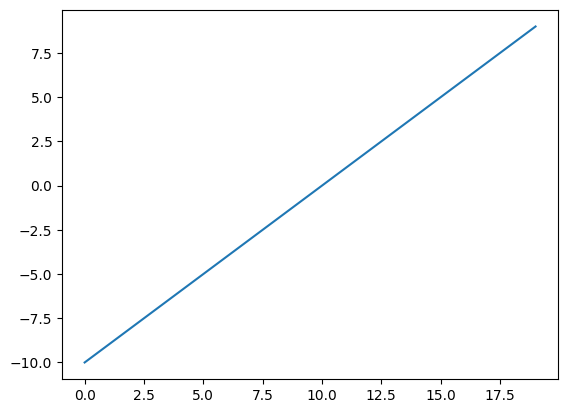

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoïd - simoïde(x) = 1/ (1 + exp(-x))
def sigmoid(x):
  return 1/ (1 + tf.exp(-x))

In [ ]:
# Use the sigmoid fuction on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

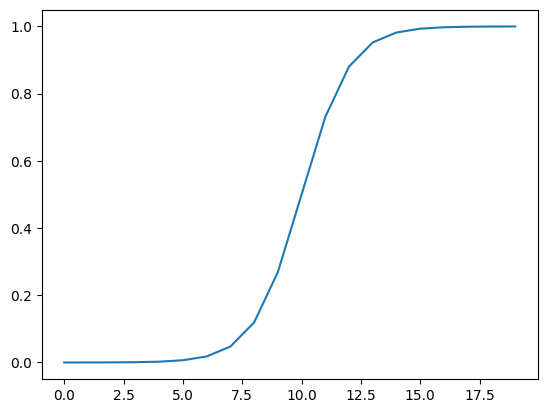

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
# Let's start by replicating Rectified Linear Unit - Relu(x) = max(0, x)
def relu(x):
  return tf.maximum(0, x)

In [ ]:
# Use the relu fuction on our toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

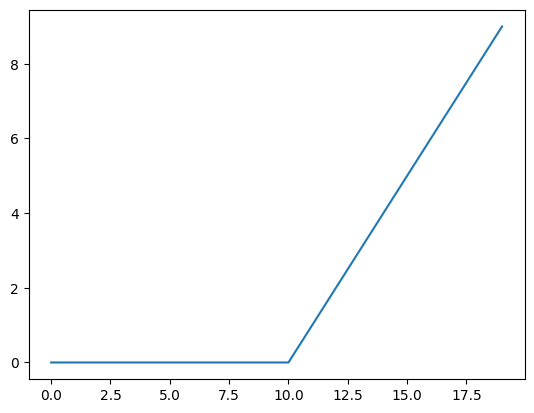

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(relu(A))

In [ ]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

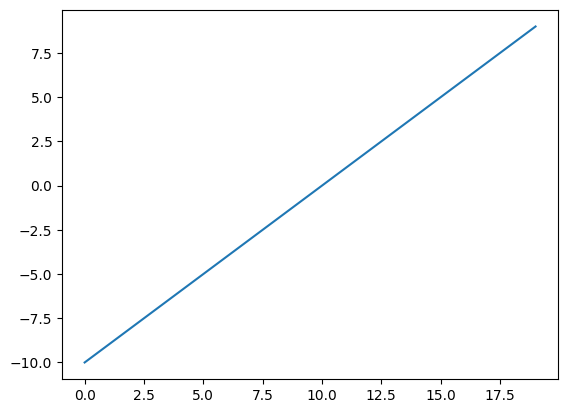

In [ ]:
# Does the linear activation function change anything ?
plt.plot(tf.keras.activations.linear(A));

In [ ]:
# Does A even change ?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we have been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So, let's create a training and test set.

In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y [:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the testing data
# Retry with activation of output layer as simgmoïd
# Set the random seed
tf.random.set_seed(42)
early_stopping = create_early_stopping("accuracy", 3)
# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # learning rate is the rate of improvments for each epochs.
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train,
            y_train,
            epochs=100,
            callbacks=[early_stopping]
)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.5150
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5325
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.6000
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.7275
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.7788
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8788
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.9625
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9812
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0820 - accuracy: 0.9950
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9900
Epoch 11/

In [ ]:
model_7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 6)                 18        
                                                                 
 dense_16 (Dense)            (None, 6)                 42        
                                                                 
 dense_17 (Dense)            (None, 6)                 42        
                                                                 
 dense_18 (Dense)            (None, 1)                 7         
                                                                 
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9850


[0.04653694108128548, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


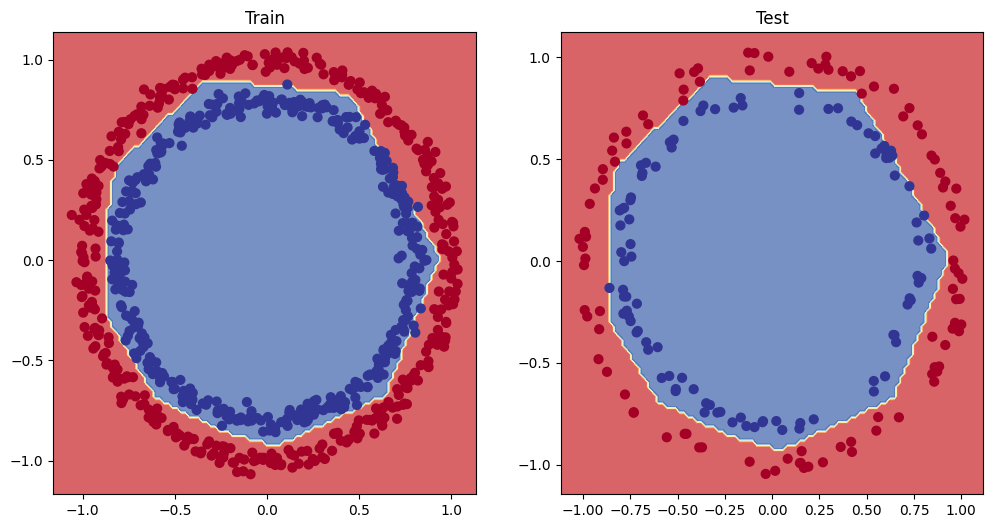

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)

## Plot the loss (or training) curves

Text(0.5, 1.0, 'Model_8 loss curves')

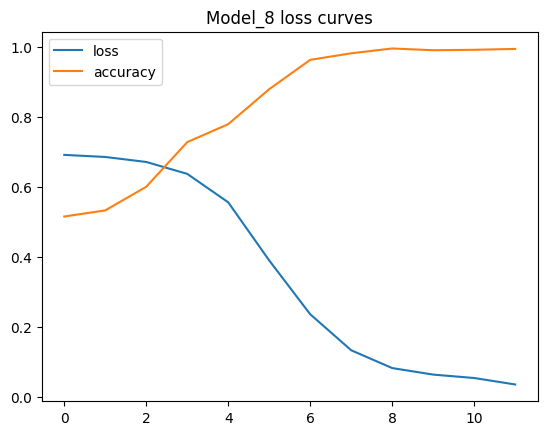

In [ ]:
# Convert the history object nto a dataframe
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate with the loss decreseases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here).
* A modified loss curves plot.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

early_stopping_ = create_early_stopping("accuracy", 3)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 1. Create the model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # learning rate is the rate of improvments for each epochs.
                metrics=["accuracy"])

# 3. Fit the model (passing scheduler callback)
history_9 = model_9.fit(X_train,
            y_train,
            epochs=100,
            callbacks=[lr_scheduler]
)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.4913 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.4913 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4975 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.4925 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

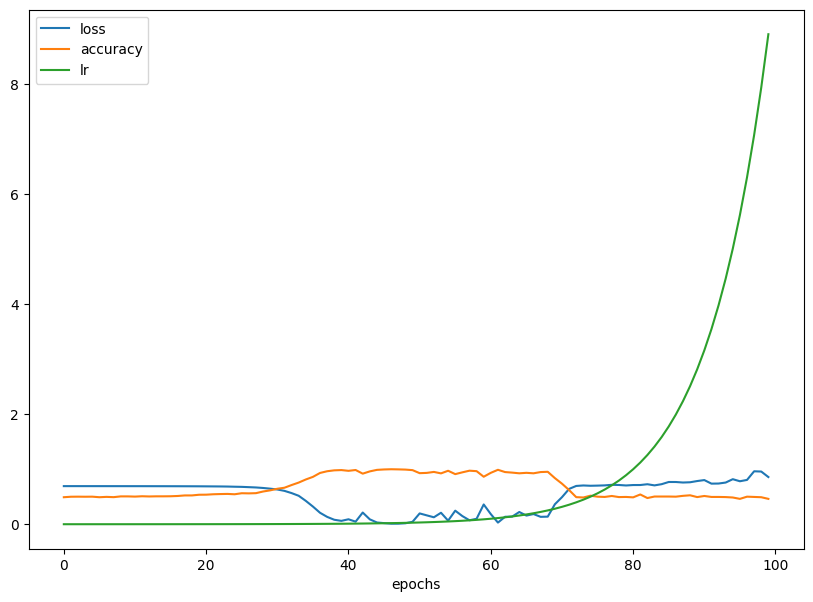

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7),
                                     xlabel="epochs")

### TensorBoard CallBack

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension ✅
2. Create a TensorBoard callback which is able to save logs to our directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard`magic function (we'll do this after model training).

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard Callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Dog vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

Text(0.5, 1.0, 'Learning rate vs. Loss')

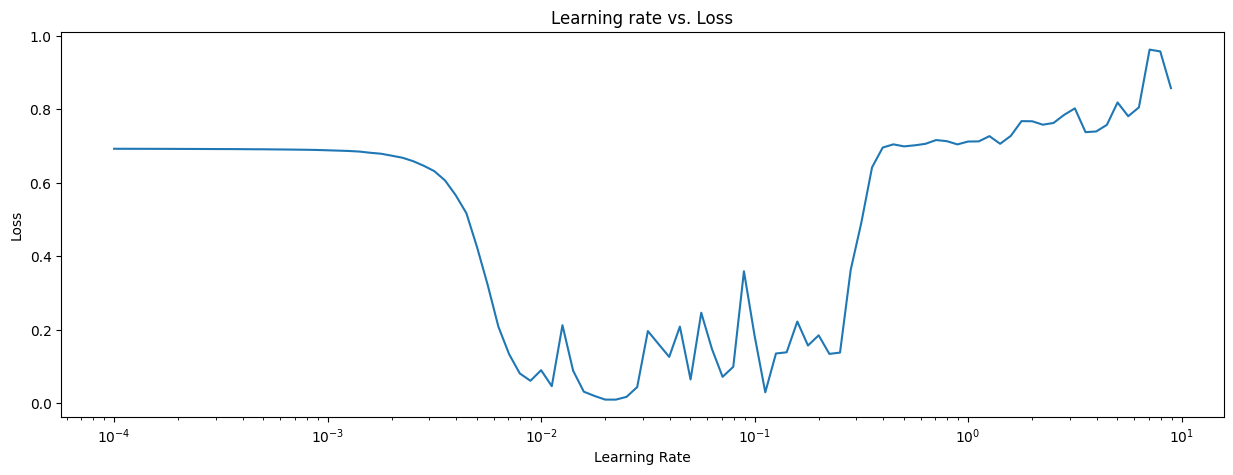

In [ ]:
# Plot the learning rate value vs the loss
plt.figure(figsize=(15,5))
plt.semilogx(history_9.history["lr"],
             history_9.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [ ]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

The ideal value of the learning rate is between the lower point of the curves and ten times lower.

In [ ]:
# Let's try using a higher learning rate with the same model as before
# Set the random seed
tf.random.set_seed(42)

early_stopping = create_early_stopping("accuracy", 10)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 1. Create the model (same as model_8)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.011), # learning rate is the rate of improvments for each epochs.
                metrics=["accuracy"])

# 3. Fit the model (passing scheduler callback)
history_10 = model_10.fit(X_train,
            y_train,
            epochs=100,
            callbacks=[early_stopping]
)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6962 - accuracy: 0.4600
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5412
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.6438
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6187 - accuracy: 0.7475
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.8300
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.9187
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9875
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1105 - accuracy: 0.9962
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9962
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9962
Epoch 11/

In [ ]:
# Evaluate model test on test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000


[0.007558617740869522, 1.0]

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9850


[0.04653694108128548, 0.9850000143051147]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


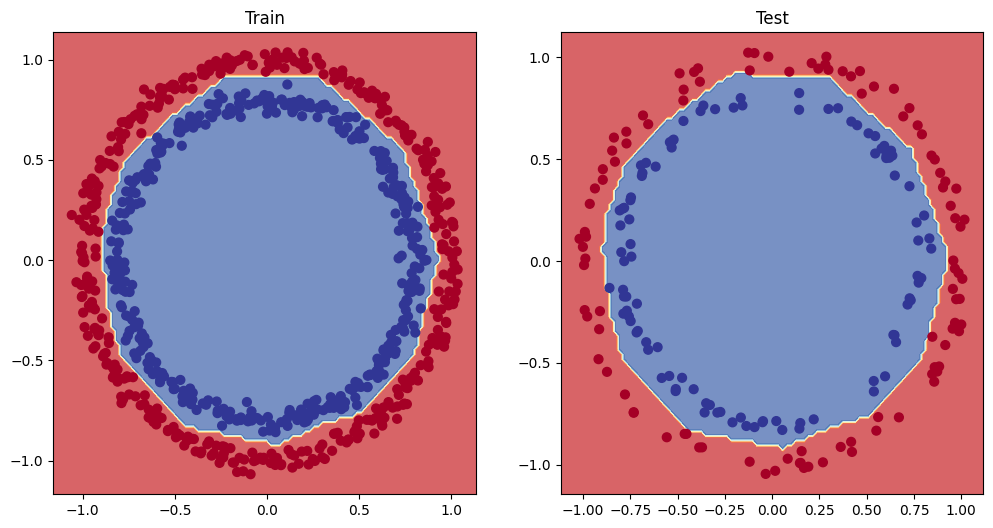

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1
* Confusion matrix
* Classification report (from sklearn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print("Model loss on the test set: {}".format(loss))
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000
Model loss on the test set: 0.007558617740869522
Model accuracy on the test set: 100.00%


How about a confusion matrix ?

In [ ]:
# Create a confsion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = model_10.predict(X_test)

# # Create confusion matrix
# confusion_matrix(y_test, y_pred)

7/7 [==============================] - 0s 2ms/step


In [ ]:
y_test.shape

(200,)

In [ ]:
y_pred[:10]

array([[9.9929452e-01],
       [9.9997234e-01],
       [9.9959368e-01],
       [9.9940753e-01],
       [1.1235351e-02],
       [1.6374612e-04],
       [9.9908096e-01],
       [3.3008591e-06],
       [9.9949074e-01],
       [1.7406663e-05]], dtype=float32)

Oups...look like our predictions array as come out in **prediction probability** form...the standard output from the sigmoid (or softmax) activation functions.

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
y_pred = tf.cast(np.round(y_pred), tf.int64)
y_pred.shape

TensorShape([200, 1])

In [ ]:
# Create confusion matrix
confusion_matrix(y_test, y_pred)

array([[101,   0],
       [  0,  99]])

**Note:** The confusion matrix we are about to write is a remix of scikitlearn's plot confusion_matrix
https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/metrics/_classification.py#L232

In [ ]:
import itertools

def conf_mat(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix, newaxis transfome chaque case en tableau.
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

# Set labels to be classes
  if classes:
    labels = classes
  else:
    labels= np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set the axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom() # 0 et 1 en bas

  # Adjust label_size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

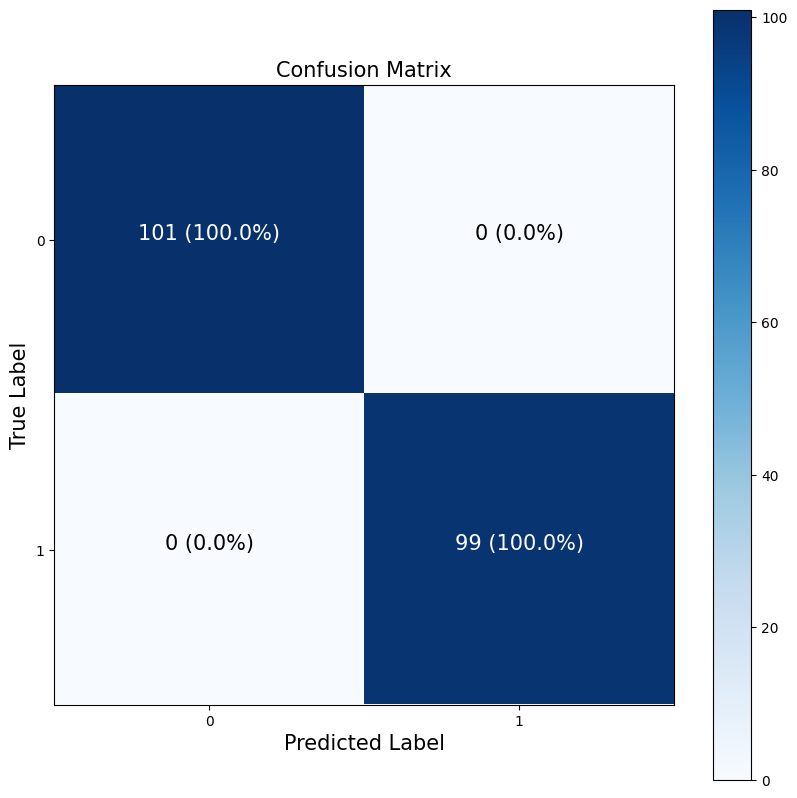

In [ ]:
conf_mat(y_test, y_pred)

## Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 differents classes, it's multi-class classification.
* It also means if you have 100 classes, it's also muli-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

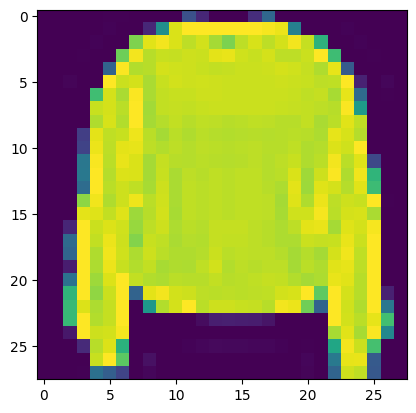

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
# Check out samples label
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

In [ ]:
class_names[train_labels[7]]

'Pullover'

Text(0.5, 1.0, 'Coat')

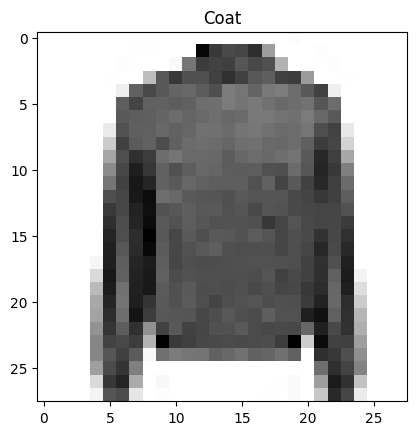

In [ ]:
# Plot an example and its label
index_of_choice = np.random.randint(0, 60000)
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

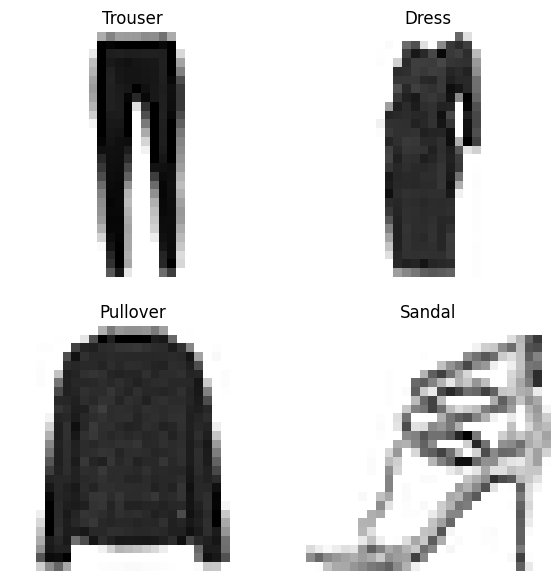

In [ ]:
# Plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 * 28 (shape of an image)
* Output shape = 10 (number of classes)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one hot encode use CategoricalCrossentropy()
  * If your labels are integers form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax

In [ ]:
IMG_SIZE = 28
INPUT_SHAPE = [IMG_SIZE, IMG_SIZE]
OUTPUT_SHAPE = len(class_names)

In [ ]:
# Our data need to be flattened from (28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=INPUT_SHAPE)])
flatten_model.output_shape

(None, 784)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

early_stopping = create_early_stopping("accuracy", 10)

# 1. Create the model (same as model_8)
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(OUTPUT_SHAPE, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.011), # learning rate is the rate of improvments for each epochs.
                metrics=["accuracy"])


# 3. Fit the model (passing scheduler callback)
non_norm_history = model_11.fit(train_data,
            tf.one_hot(train_labels, depth=10), # les labels sont sous la forme de chiffre et non de ligne de 0 et de 1
            epochs=10,
            validation_data=(test_data, tf.one_hot(test_labels, depth=10)),
            callbacks=[early_stopping]
)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 2.3156 - accuracy: 0.1013 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3041 - accuracy: 0.0973 - val_loss: 2.3050 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3042 - accuracy: 0.0994 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3041 - accuracy: 0.1001 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3040 - accuracy: 0.1000 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3040 - accuracy: 0.1001 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3041 - accuracy: 0.0985 - val_loss: 2.3032 - val_accuracy:

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 6)                 4710      
                                                                 
 dense_32 (Dense)            (None, 6)                 42        
                                                                 
 dense_33 (Dense)            (None, 6)                 42        
                                                                 
 dense_34 (Dense)            (None, 10)                70        
                                                                 
Total params: 4,864
Trainable params: 4,864
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1.

In [ ]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum.
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized, let's build a model to find patterns in it

# Set the random seed
tf.random.set_seed(42)

early_stopping = create_early_stopping("accuracy", 10)

# 1. Create the model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(OUTPUT_SHAPE, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.011), # learning rate is the rate of improvments for each epochs.
                metrics=["accuracy"])


# 3. Fit the model (passing scheduler callback)
norm_history = model_12.fit(train_data_norm,
            tf.one_hot(train_labels, depth=10), # les labels sont sout la forme de chiffre et non de ligne de 0 et de 1
            epochs=50,
            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)),
            callbacks=[early_stopping]
)

Epoch 1/50
1875/1875 [==============================] - 16s 7ms/step - loss: 1.0431 - accuracy: 0.5650 - val_loss: 0.8815 - val_accuracy: 0.6550
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8401 - accuracy: 0.6682 - val_loss: 0.8110 - val_accuracy: 0.6851
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8131 - accuracy: 0.6781 - val_loss: 0.8311 - val_accuracy: 0.6697
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7947 - accuracy: 0.6817 - val_loss: 0.7896 - val_accuracy: 0.6831
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7832 - accuracy: 0.6842 - val_loss: 0.8118 - val_accuracy: 0.6783
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7683 - accuracy: 0.6930 - val_loss: 0.7917 - val_accuracy: 0.6828
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7651 - accuracy: 0.6950 - val_loss: 0.8083 - val_accuracy

🔑 **Note:** Neural networks tend to prefer data in numeracal form as well as scaled/normalized (numbers between 0 & 1).

<Axes: title={'center': 'normalized data'}, xlabel='epochs'>

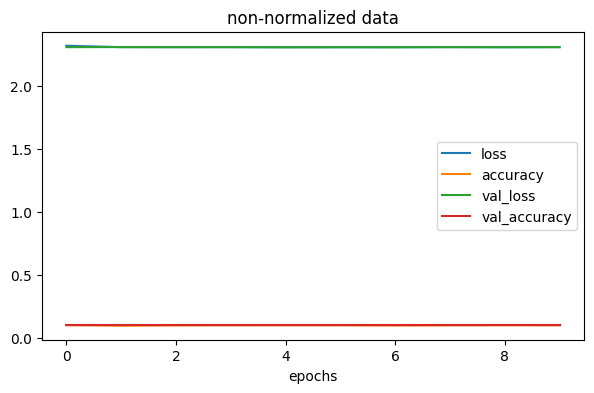

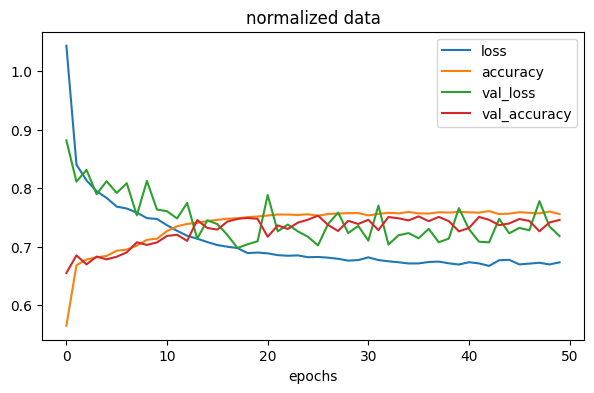

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(figsize=(7, 4),
                                     xlabel="epochs",
                                     title="non-normalized data")

# Plot non-normalized data loss curves
pd.DataFrame(norm_history.history).plot(figsize=(7, 4),
                                     xlabel="epochs",
                                     title="normalized data")

> 🔑 **Note:** The same model with even *slighty* different data can produce *dramatically* different results. So when your are comparing models, it's important to make sure you 're comparing on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

early_stopping = create_early_stopping("accuracy", 10)

# 1. Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(OUTPUT_SHAPE, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.011), # learning rate is the rate of improvments for each epochs.
                metrics=["accuracy"])


# 3. Fit the model (passing scheduler callback)
find_lr_history = model_13.fit(train_data_norm,
            tf.one_hot(train_labels, depth=10), # les labels sont sout la forme de chiffre et non de ligne de 0 et de 1
            epochs=40,
            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)),
            callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 6s 2ms/step - loss: 0.9622 - accuracy: 0.6565 - val_loss: 0.6322 - val_accuracy: 0.7752 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5776 - accuracy: 0.7974 - val_loss: 0.5906 - val_accuracy: 0.7972 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5429 - accuracy: 0.8090 - val_loss: 0.5726 - val_accuracy: 0.7931 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5212 - accuracy: 0.8187 - val_loss: 0.5331 - val_accuracy: 0.8155 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5075 - accuracy: 0.8231 - val_loss: 0.5296 - val_accuracy: 0.8129 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5004 - accuracy: 0.8253 - val_loss: 0.5390 - val_accuracy: 0.8082 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Learning rate vs. Loss')

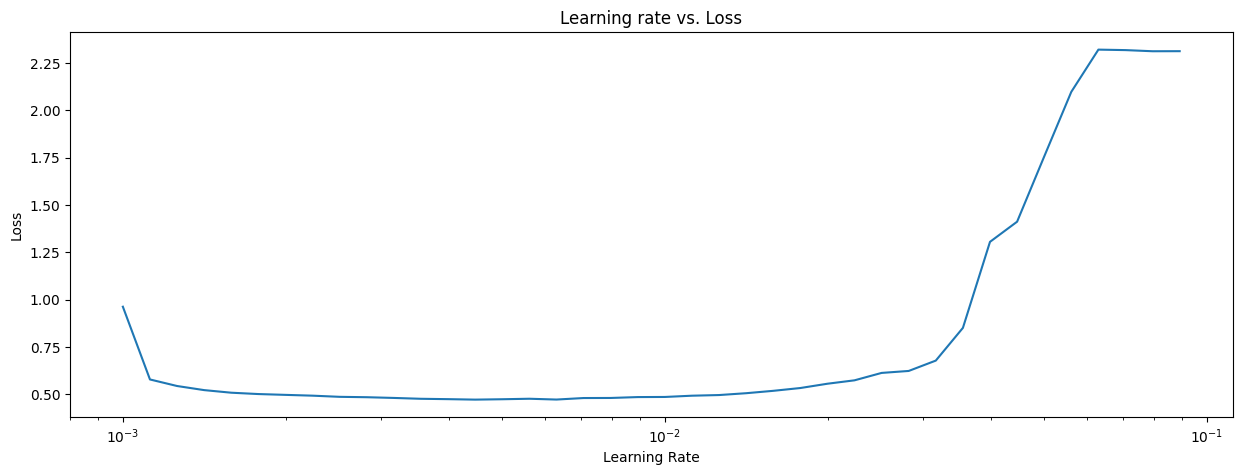

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Plot the learning rate decay curve
plt.figure(figsize=(15,5))
plt.semilogx(find_lr_history.history["lr"],
             find_lr_history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [ ]:
# Let's refit a model with the ideal learning rate
# Set the random seed
tf.random.set_seed(42)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

early_stopping = create_early_stopping("accuracy", 10)

# 1. Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(OUTPUT_SHAPE, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_14.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # learning rate is the rate of improvments for each epochs.
                metrics=["accuracy"])


# 3. Fit the model (passing scheduler callback)
history_14 = model_14.fit(train_data_norm,
            tf.one_hot(train_labels, depth=10), # les labels sont sout la forme de chiffre et non de ligne de 0 et de 1
            epochs=20,
            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10))

)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9992 - accuracy: 0.6093 - val_loss: 0.6312 - val_accuracy: 0.7722
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5713 - accuracy: 0.7972 - val_loss: 0.5610 - val_accuracy: 0.8087
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5250 - accuracy: 0.8173 - val_loss: 0.5486 - val_accuracy: 0.8050
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5001 - accuracy: 0.8244 - val_loss: 0.5215 - val_accuracy: 0.8202
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4846 - accuracy: 0.8302 - val_loss: 0.5198 - val_accuracy: 0.8187
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4720 - accuracy: 0.8343 - val_loss: 0.5350 - val_accuracy: 0.8128
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4638 - accuracy: 0.8368 - val_loss: 0.5381 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in application

Let's go through the top 2...

🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
y_pred = model_14.predict(test_data_norm)

313/313 [==============================] - 1s 1ms/step


In [ ]:
tf.argmax(y_pred, axis=1), test_labels[0], y_pred[0]

(<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 6, 1, 5])>,
 9,
 array([6.7235833e-06, 1.3820240e-15, 3.8186437e-11, 6.8337204e-11,
        4.1210110e-13, 1.0290324e-01, 3.3964014e-09, 7.4346870e-02,
        6.9419830e-04, 8.2204890e-01], dtype=float32))

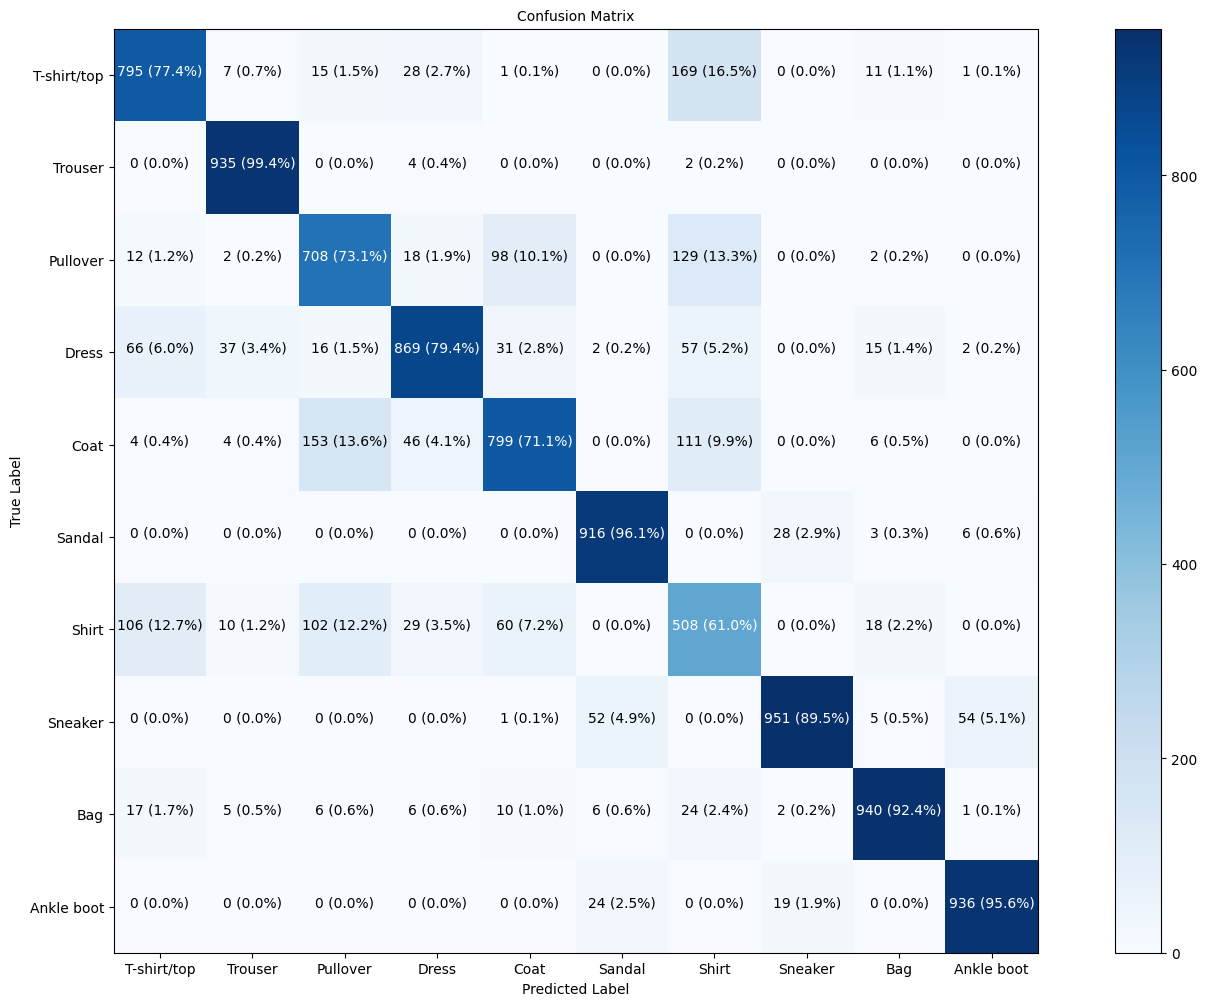

In [ ]:
# Create a confusion matrix
conf_mat(tf.argmax(y_pred, axis=1), test_labels, class_names, figsize=(20, 12), text_size=10)

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make prediction on said image
* Label the plot with the truth label & the predicted label


In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  '''
  Picks a random image, plots it and labels it with a prediction and truth label.
  '''
  # Set up random integer
  i= random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.figure(figsize=(7,7))
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the predictions is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)


1/1 [==============================] - 0s 21ms/step


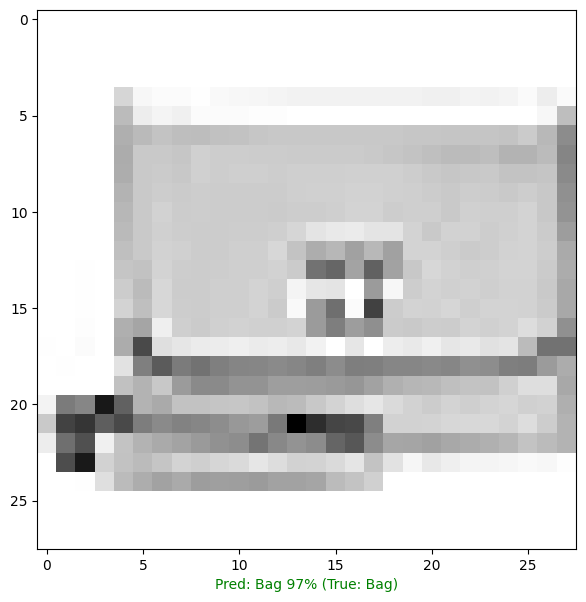

In [ ]:
# Check out our model image as well as its prediction
plot_random_image(model_14,
                  images=test_data_norm, # Always make predictions on the same kind of data your model was trained on.
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning ?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weigths, biases = model_14.layers[1].get_weights()

# Shapes
weigths, weigths.shape

(array([[ 0.58717674,  0.00590534, -0.09661999, -0.5973654 , -0.34143585,
         -0.30984917],
        [ 0.93160224, -0.3250128 , -0.07163016, -0.23071127,  0.8411516 ,
         -0.7660634 ],
        [ 0.67863274, -0.49123484,  1.0533605 , -0.99852854,  0.45370215,
         -0.8125414 ],
        ...,
        [ 0.39717138,  0.08380666, -0.10273556, -0.09227458, -0.13312343,
         -0.22595161],
        [ 0.3673649 , -0.09763716,  0.11309861, -0.62088823, -0.4685898 ,
          0.5321596 ],
        [ 0.61284405, -0.31158608,  0.3489085 , -0.551234  ,  0.45172027,
         -0.0281506 ]], dtype=float32),
 (784, 6))

Numbers in the weigth are absolutely random at first and are initialized with `Kernel_initializer`='glorot_uniform'

In [ ]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_43 (Dense)            (None, 6)                 4710      
                                                                 
 dense_44 (Dense)            (None, 6)                 42        
                                                                 
 dense_45 (Dense)            (None, 6)                 42        
                                                                 
 dense_46 (Dense)            (None, 10)                70        
                                                                 
Total params: 4,864
Trainable params: 4,864
Non-trainable params: 0
_________________________________________________________________


Now let's check out our bias vector...

In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([ 0.7286984 ,  0.89236826,  0.06002789, -0.07451897,  0.11802807,
         0.74437565], dtype=float32),
 (6,))

Every neuron has a bias vector. Each of these is paired with a weigths matrix.

The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictate how much the patterns within the corresponding weigths matrix should influence the next layer.

In [ ]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_43 (Dense)            (None, 6)                 4710      
                                                                 
 dense_44 (Dense)            (None, 6)                 42        
                                                                 
 dense_45 (Dense)            (None, 6)                 42        
                                                                 
 dense_46 (Dense)            (None, 10)                70        
                                                                 
Total params: 4,864
Trainable params: 4,864
Non-trainable params: 0
_________________________________________________________________


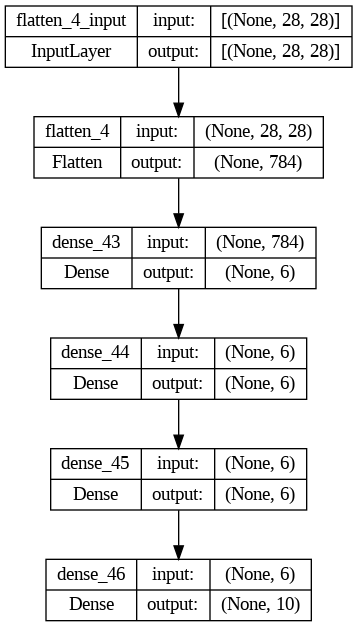

In [ ]:
# Let's checkout another way of viewing our deep learning model
from tensorflow.keras.utils import plot_model
plot_model(model_14, show_shapes=True)

### 🛠 02. Neural network classification with TensorFlow Exercises

1. Play with neural networks in the [TensorFlow Playground](https://playground.tensorflow.org/) for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?
2. Replicate the model pictured in the [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
![tensorflow playground example neural network](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)
*Try this network out for yourself on the [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.*
3. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.
4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
5. Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the [classification tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.
7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

early_stopping = create_early_stopping("accuracy", 10)

# 1. Create the model
model_15 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu, input_shape=(1,)),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(OUTPUT_SHAPE, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_15.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # learning rate is the rate of improvments for each epochs.
                metrics=["accuracy"])


In [ ]:
model_15.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 6)                 12        
                                                                 
 dense_48 (Dense)            (None, 6)                 42        
                                                                 
 dense_49 (Dense)            (None, 6)                 42        
                                                                 
 dense_50 (Dense)            (None, 6)                 42        
                                                                 
 dense_51 (Dense)            (None, 6)                 42        
                                                                 
 dense_52 (Dense)            (None, 6)                 42        
                                                                 
 dense_53 (Dense)            (None, 10)              

In [ ]:
from sklearn.datasets import make_moons

n_samples = 1000
X, y = make_moons(n_samples,
                  noise=0.03,
                  random_state=42)

In [ ]:
X

array([[-0.00933187,  0.39098105],
       [ 0.95457387, -0.47375583],
       [ 0.9185256 , -0.42519648],
       ...,
       [ 1.65391483, -0.29179795],
       [-0.9341017 ,  0.35358221],
       [ 0.7968358 ,  0.60423662]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
moons = pd.DataFrame({"X0": X[:,0],
                      "X1": X[:, 1],
                      "y": y})
moons

,X0,X1,y
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


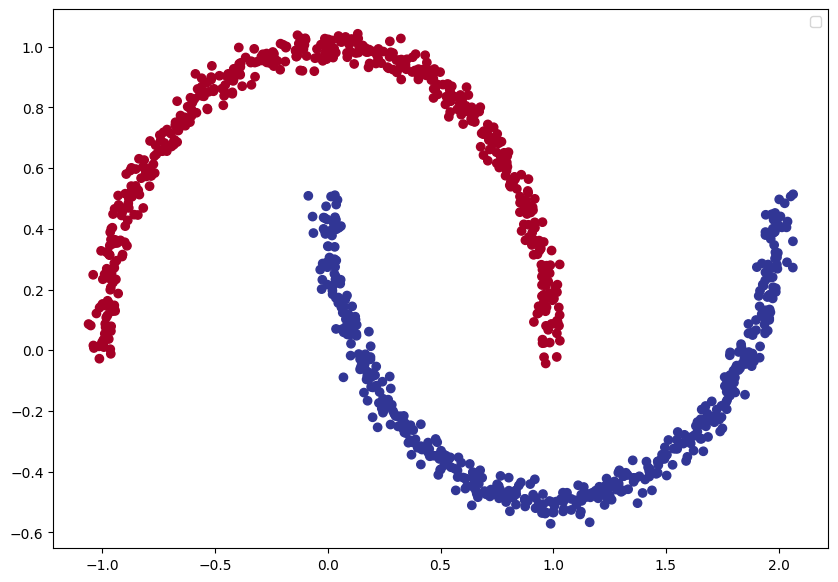

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(moons["X0"],
            moons["X1"],
            c=y,
            cmap=plt.cm.RdYlBu)
plt.legend()

In [ ]:
len(X)
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [ ]:
 # Set the random seed
tf.random.set_seed(42)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

early_stopping = create_early_stopping("accuracy", 10)

# 1. Create the model
model_16 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_16.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # learning rate is the rate of improvments for each epochs.
                metrics=["accuracy"])

# 3. Fit the model (passing scheduler callback)
history_16 = model_16.fit(X_train,
                          y_train, # les labels sont sout la forme de chiffre et non de ligne de 0 et de 1
                          epochs=50,
                          validation_data=(X_test, y_test)

)

Epoch 1/50
25/25 [==============================] - 2s 18ms/step - loss: 0.6206 - accuracy: 0.7663 - val_loss: 0.5190 - val_accuracy: 0.8300
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 0.4234 - accuracy: 0.8750 - val_loss: 0.3582 - val_accuracy: 0.8350
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.3001 - accuracy: 0.8763 - val_loss: 0.2857 - val_accuracy: 0.8350
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.2495 - accuracy: 0.8863 - val_loss: 0.2628 - val_accuracy: 0.8700
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2261 - accuracy: 0.8900 - val_loss: 0.2357 - val_accuracy: 0.8650
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2126 - accuracy: 0.8850 - val_loss: 0.2305 - val_accuracy: 0.8900
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2053 - accuracy: 0.8900 - val_loss: 0.2240 - val_accuracy: 0.9000
Epoch 8/50
25/25 [=

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


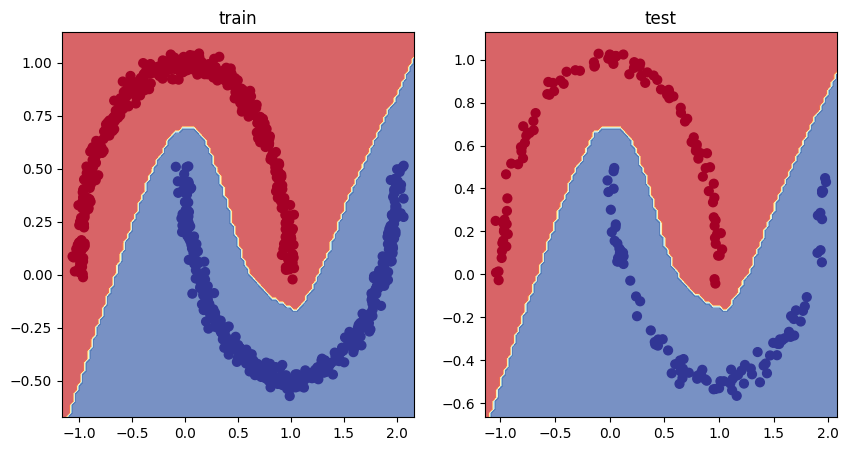

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_16,
                       X_train,
                       y_train
                      )
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_16,
                       X_test,
                       y_test
                       )

In [ ]:
 # Set the random seed
tf.random.set_seed(42)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

early_stopping = create_early_stopping("accuracy", 10)

# 1. Create the model
model_17 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_17.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # learning rate is the rate of improvments for each epochs.
                metrics=["accuracy"])

# 3. Fit the model (passing scheduler callback)
history_17 = model_17.fit(X_train,
                          y_train, # les labels sont sout la forme de chiffre et non de ligne de 0 et de 1
                          epochs=100,
                          validation_data=(X_test, y_test),
                          callbacks=[lr_scheduler]
)

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 0.6736 - accuracy: 0.8238 - val_loss: 0.6636 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.8250 - val_loss: 0.6404 - val_accuracy: 0.7800 - lr: 0.0011
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.8200 - val_loss: 0.6072 - val_accuracy: 0.7800 - lr: 0.0013
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5826 - accuracy: 0.8225 - val_loss: 0.5596 - val_accuracy: 0.7850 - lr: 0.0014
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5251 - accuracy: 0.8263 - val_loss: 0.4978 - val_accuracy: 0.7850 - lr: 0.0016
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4578 - accuracy: 0.8325 - val_loss: 0.4345 - val_accuracy: 0.8000 - lr: 0.0018
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.

Text(0.5, 1.0, 'Learning rate vs loss')

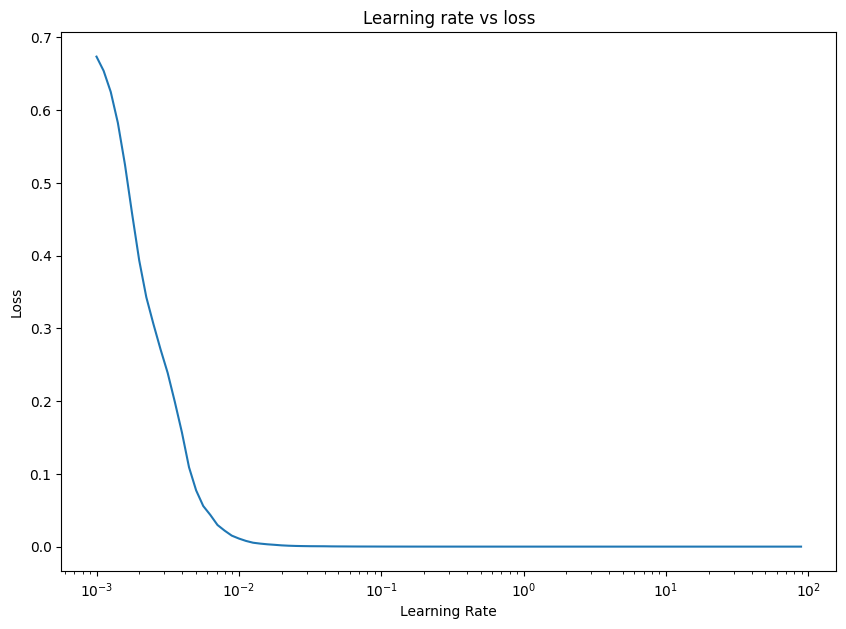

In [ ]:
plt.figure(figsize=(10, 7))
plt.semilogx(history_17.history["lr"],
             history_17.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

early_stopping = create_early_stopping("accuracy", 10)

# 1. Create the model
model_18 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(OUTPUT_SHAPE, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_18.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # learning rate is the rate of improvments for each epochs.
                metrics=["accuracy"])


# 3. Fit the model (passing scheduler callback)
history_18 = model_18.fit(train_data_norm,
            tf.one_hot(train_labels, depth=10), # les labels sont sout la forme de chiffre et non de ligne de 0 et de 1
            epochs=100,
            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10))

)

Epoch 1/100
1875/1875 [==============================] - 16s 7ms/step - loss: 0.5735 - accuracy: 0.8008 - val_loss: 0.4440 - val_accuracy: 0.8409
Epoch 2/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3857 - accuracy: 0.8610 - val_loss: 0.4682 - val_accuracy: 0.8422
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3456 - accuracy: 0.8737 - val_loss: 0.3895 - val_accuracy: 0.8571
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3215 - accuracy: 0.8822 - val_loss: 0.4066 - val_accuracy: 0.8557
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3043 - accuracy: 0.8873 - val_loss: 0.3671 - val_accuracy: 0.8680
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2896 - accuracy: 0.8925 - val_loss: 0.3690 - val_accuracy: 0.8677
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2781 - accuracy: 0.8960 - val_loss: 0.3760 - val_

In [ ]:
y_pred_18 = model_18.predict(test_data_norm)

313/313 [==============================] - 1s 2ms/step


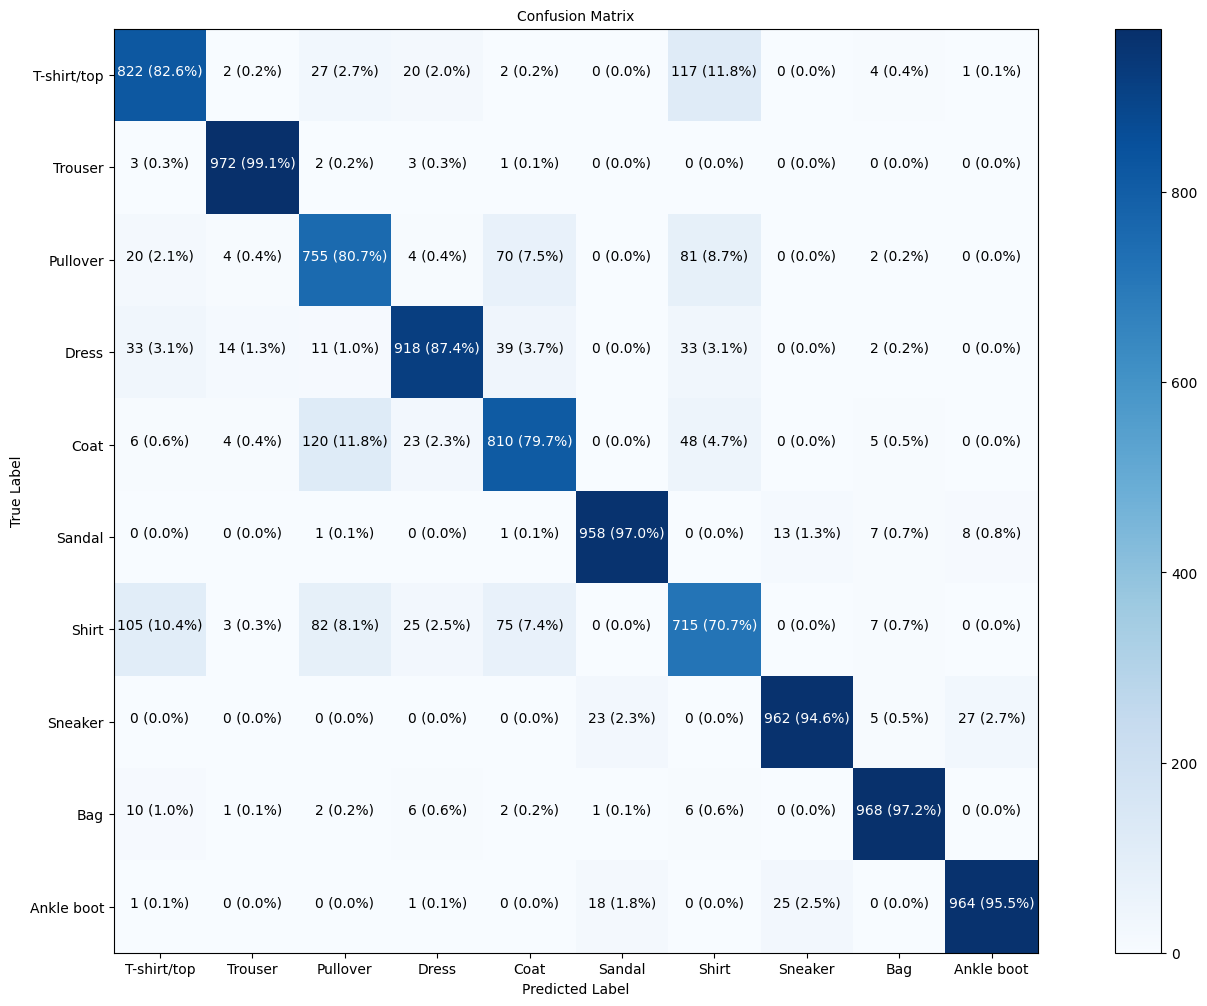

In [ ]:
# Create a confusion matrix
conf_mat(tf.argmax(y_pred_18, axis=1), test_labels, class_names, figsize=(20, 12), text_size=10)

In [ ]:
# Create a softmax function:
def softmax_func(x):
  y = []
  t = tf.reduce_max(x)

  for i in range(len(x)):
    y.append(np.math.exp(x[i]-t))

  sumExp = sum(y)

  for i in range(len(x)):
   y[i] = y[i] / sumExp

  return tf.constant(y)

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
softmax_func(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([3.5416428e-09, 9.6271835e-09, 2.6169397e-08, 7.1135794e-08,
       1.9336714e-07, 5.2562638e-07, 1.4288007e-06, 3.8838830e-06,
       1.0557488e-05, 2.8698229e-05, 7.8009878e-05, 2.1205282e-04,
       5.7641935e-04, 1.5668703e-03, 4.2591947e-03, 1.1577692e-02,
       3.1471431e-02, 8.5548215e-02, 2.3254415e-01, 6.3212055e-01],
      dtype=float32)>

In [ ]:
len(A)

20

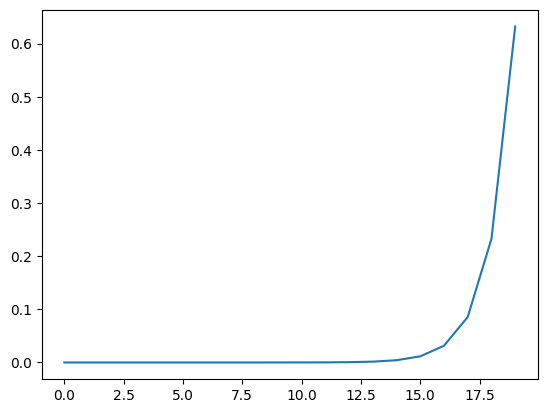

In [ ]:
plt.plot(softmax_func(A))

In [ ]:
import random

def plot_random_image_(model, images, true_labels, classes, choice):
  '''
  Picks a random image, plots it and labels it with a prediction and truth label.
  '''
  # Set up random integer
  if choice:
    list_index = [index for index, true_label in enumerate(true_labels) if classes[true_label] == choice]
    i= random.choice(list_index)
  else:
    i= random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  # Change the color of the titles depending on if the predictions is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)
  print(choice)

In [ ]:
# Plot a few images randomly

def images_random(model, images, true_labels, classes, choice=None):
  plt.figure(figsize=(8,8))
  for i in range(4):
    plt.subplot(2,2,i+1)
    plot_random_image_(model, images, true_labels, classes, choice)

1/1 [==============================] - 0s 22ms/step
None
1/1 [==============================] - 0s 21ms/step
None
1/1 [==============================] - 0s 23ms/step
None
1/1 [==============================] - 0s 24ms/step
None


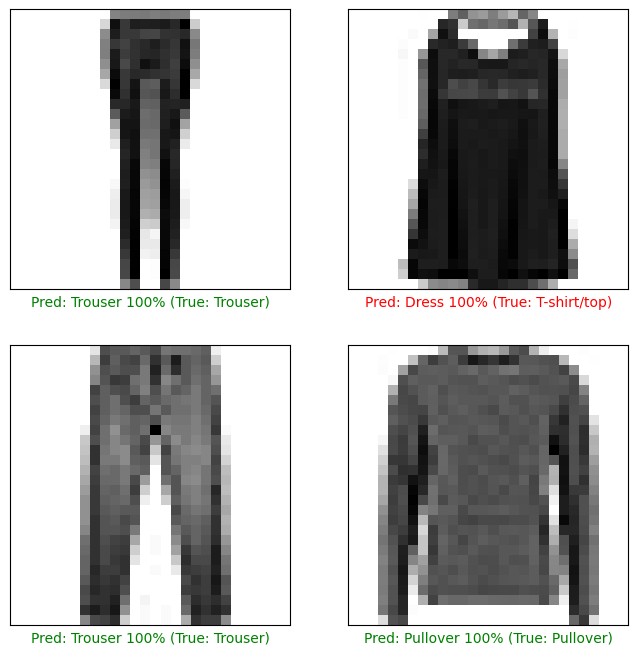

In [ ]:
images_random(model_18, test_data, test_labels, class_names)

1/1 [==============================] - 0s 31ms/step
Pullover
1/1 [==============================] - 0s 36ms/step
Pullover
1/1 [==============================] - 0s 40ms/step
Pullover
1/1 [==============================] - 0s 32ms/step
Pullover


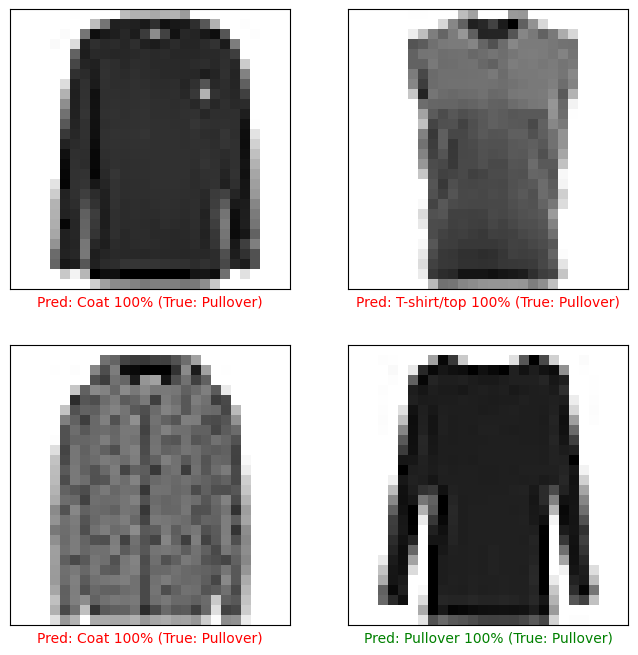

In [ ]:
images_random(model_18, test_data, test_labels, class_names, choice="Pullover")

### 📖 02. Neural network classification with TensorFlow Extra-curriculum

* Watch 3Blue1Brown's neural networks video 2: [*Gradient descent, how neural networks learn*](https://www.youtube.com/watch?v=IHZwWFHWa-w). After you're done, write 100 words about what you've learned.
  * If you haven't already, watch video 1: [*But what is a Neural Network?*](https://www.youtube.com/watch?v=7sB052Pz0sQ&ab_channel=AlexanderAmini). Note the activation function they talk about at the end.
* Watch [MIT's introduction to deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) (if you haven't already) to get an idea of the concepts behind using linear and non-linear functions.
* Spend 1-hour reading [Michael Nielsen's Neural Networks and Deep Learning book](http://neuralnetworksanddeeplearning.com/index.html).
* Read the [ML-Glossary documentation on activation functions](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html). Which one is your favourite?
  * After you've read the ML-Glossary, see which activation functions are available in TensorFlow by searching "tensorflow activation functions".
